# Homework Questions for Session 3 Classification 

 [Link to Session 3 Classification Homework Questions](https://https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md)

## Dataset 

Dataset is from Github [Car Price Dataset](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv)

In [2]:
import wget
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
filename = wget.download(url)
filename


  0% [                                                                          ]       0 / 1475504
  0% [                                                                          ]    8192 / 1475504
  1% [                                                                          ]   16384 / 1475504
  1% [.                                                                         ]   24576 / 1475504
  2% [.                                                                         ]   32768 / 1475504
  2% [..                                                                        ]   40960 / 1475504
  3% [..                                                                        ]   49152 / 1475504
  3% [..                                                                        ]   57344 / 1475504
  4% [...                                                                       ]   65536 / 1475504
  4% [...                                                                       ]   73728 / 1475504

'data.csv'

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Import data
pd.options.mode.chained_assignment = None  # default='warn'

df1 = pd.read_csv('data.csv')
df1.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#List all columns
df1.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

<u> Features </u>

For the rest of the homework, you'll need to use only these columns:

- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg
- MSRP


---

## Data Preparation

- Select only the features from above and transform their names
- Fill in the missing values of the selected features with 0.
- Rename MSRP variable to price

In [4]:
#Keep data columns
df = df1[['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type',
        'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]

In [5]:
#First 5 values of data
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
#Transform column names
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
#Check for Missing Values
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
#Replace Missing Values with 0
df['engine_hp'].fillna((0), inplace=True)
df['engine_cylinders'].fillna((0), inplace=True)

In [10]:
#Check for Missing Values
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [11]:
#Rename column to price
df.rename(columns={'msrp':'price'}, inplace=True)

In [12]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


---

## Question 1 

What is the most frequent observation (mode) for the column `transmission_type`?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [13]:
#Mode for column transmission_type
df['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

`Answer: AUTOMATIC`

### Split the Data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (above_average) is not in your dataframe.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Train/Val/Test: 60%/20%/20%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
#Train: 60%/20%
df_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=42)

In [17]:
# Verify the lenght of partitions 
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [ ]:
#Delete Target Variable for all partitions
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [ ]:
#Reset indices of all partitions
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Make price binary

- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [ ]:
type(df_train)

In [ ]:
binarize = lambda x: 1 if x>= above_average else 0

if above_average > data['price'].mean():
        above_average=1 
else:
        above_average=0

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train['above_average'] = df_full_train.price >= df_full_train.price.mean()
df_full_train

---

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [20]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [21]:
numerical = ['year','engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [22]:
corr_matrix = df_train[numerical].corr()
corr_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.334546,-0.036840,0.252377,0.202211
engine_hp,0.334546,1.000000,0.781978,-0.404075,-0.434405
engine_cylinders,-0.036840,0.781978,1.000000,-0.595856,-0.596186
highway_mpg,0.252377,-0.404075,-0.595856,1.000000,0.852589
city_mpg,0.202211,-0.434405,-0.596186,0.852589,1.000000


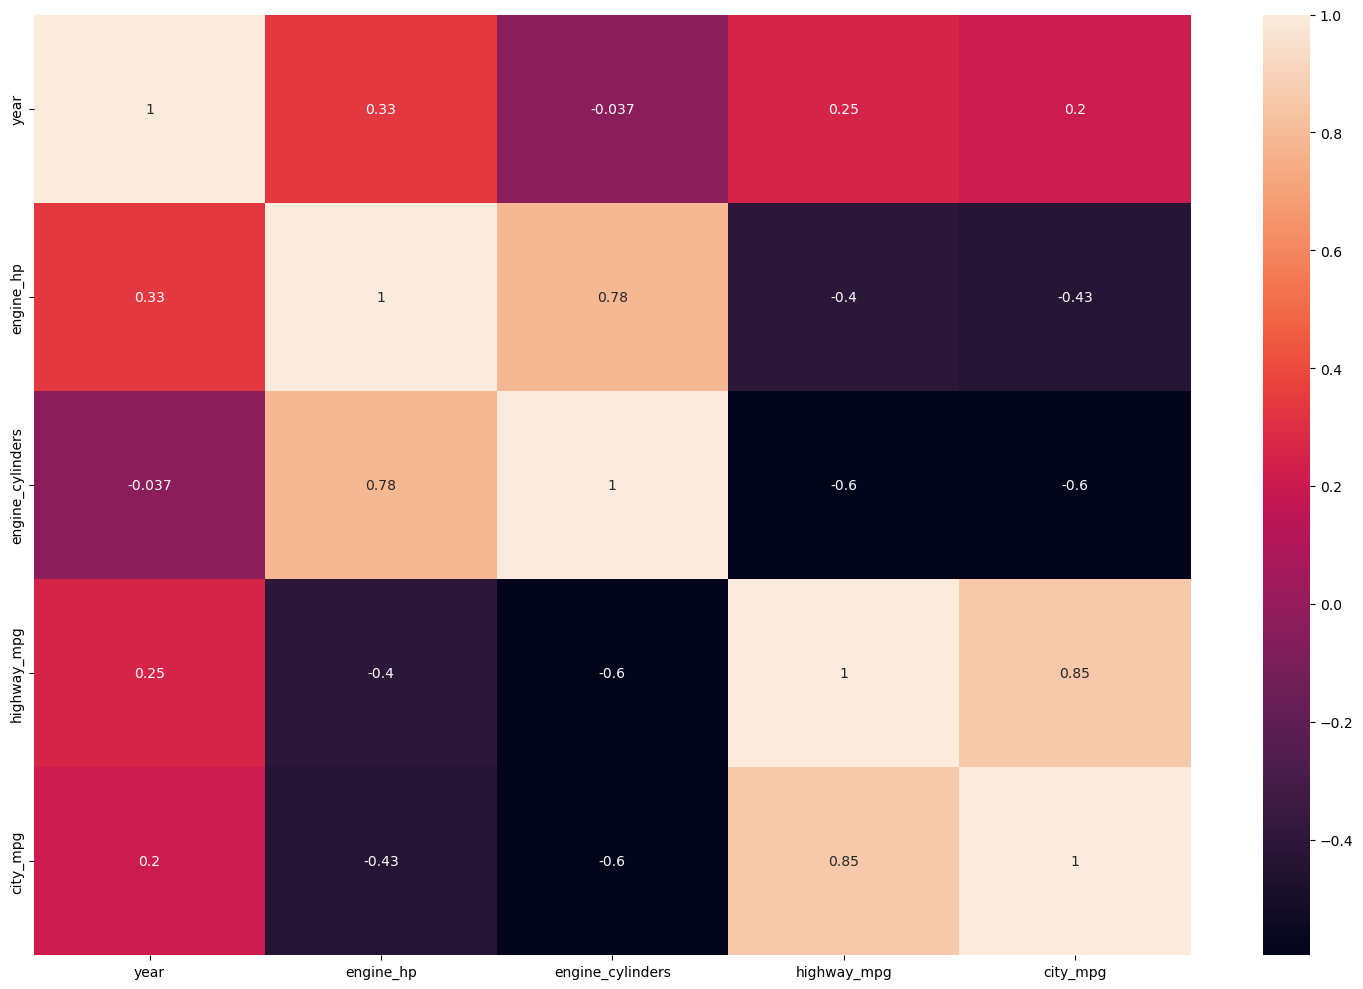

In [23]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
sns.heatmap(corr_matrix, ax=ax, annot=True)
plt.tight_layout()
plt.show()

`Answer: highway_mpg and city_mpg`

### Correlation matrix of numeric columns 
Source: https://github.com/microsoft/vscode-docs/issues/6681

### Correlations in dataset  

- engine_hp and year: 0.338714   
- engine_hp and engine_cylinders: 0.774851   
- highway_mpg and engine_cylinders: -0.614541  
- highway_mpg and city_mpg: 0.886829

---

## Question 3 

- Calculate the mutual information score between `above_average` and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

- make
- model
- transmission_type
- vehicle_style

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [26]:
def mutual_info_price_score(series):
    return mutual_info_score(series, df_train.price)

In [27]:
mi = df_train[categorical].apply(mutual_info_price_score)
mi.sort_values(ascending=False)

model                5.565079
make                 2.802731
vehicle_style        1.754973
transmission_type    0.600021
dtype: float64

`Answer: transmission_type`

---